<h1>Lesson 4. Model selection: Car mileage</h1>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/77/%22real_time_display%22_of_mileage_%28%22mpg%22%29_on_Honda_Insight.png/320px-%22real_time_display%22_of_mileage_%28%22mpg%22%29_on_Honda_Insight.png" style="height:200px;">
  
<p>In this exercise you will predict car mileage based on its properties. The data is taken from <a href="http://www-bcf.usc.edu/~gareth/ISL/">ISLR website</a>, but requires few transformations to make it usable for model building. These transformations will include: missing value imputation and normalizing the variables. </p>

<p>This dataset contains 397 car entries with following features:</p>
<ul>
<li>mpg miles per gallon (what we are trying to predict)</li>
<li>cylinders Number of cylinders between 4 and 8</li>
<li>displacement Engine displacement (cu. inches)</li>
<li>horsepower Engine horsepower</li>
<li>weight Vehicle weight (lbs.)</li>
<li>acceleration Time to accelerate from 0 to 60 mph (sec.)</li>
<li>year Model year (modulo 100)</li>
<li>origin Origin of car (1. American, 2. European, 3. Japanese)</li>
<li>name Vehicle name</ul>
</ul>


In [1]:
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option("display.max_rows", 101)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
%matplotlib inline
np.random.seed(1)

# Load the data
auto = pd.read_csv('../data/auto.csv')
print(auto.info())
auto.head()

pvals = pd.DataFrame(index=auto.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 24.9 KB
None


<h3>Q.1. Write a command that will calculate the number of missing values in this dataset</h3>

In [2]:
# Command(s)
print(f'Dataset missing values: {auto.isnull().sum().sum()}')

Dataset missing values: 5


<h3>Q.2. Write a command that will only show the rows with missing values. Can you comment on why the values might be missing (e.g. excessive prevalence of specific feature)?</h3>

In [3]:
# Command:
auto[auto.isnull().any(axis=1)]

# Comment (One - two sentence)

# All missing data comes from the horsepower feature. 

# It is likely that the data depends on the observed data, however I don't see any correlations  
#      to the missing data.

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
32,25.0,4,98.0,NaN,2046,19.0,71,1
126,21.0,6,200.0,NaN,2875,17.0,74,1
330,40.9,4,85.0,NaN,1835,17.3,80,2
336,23.6,4,140.0,NaN,2905,14.3,80,1
354,34.5,4,100.0,NaN,2320,15.8,81,2


In [4]:
auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,392.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,104.469388,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,38.491160,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,75.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,93.500000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


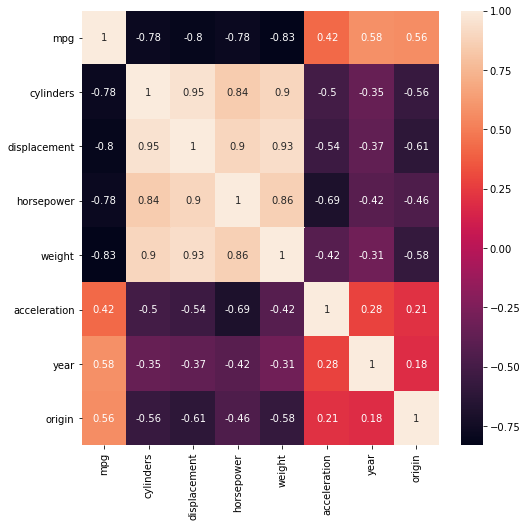

In [5]:
plt.figure(figsize=(8,8))
c= auto.corr()
sn.heatmap(c,annot=True);

#plt.figure()
#sn.pairplot(auto);

<h3>Q.3. Impute the missing values using median for the column. Given answer to Q.2, is this a good approach to fix the missing value problem?</h3>

In [6]:
# Command(s):
auto.horsepower.describe()
m = auto.horsepower.median()
auto.horsepower = auto.horsepower.fillna(m)

# Comment (one sentence):
# The horsepower distribution is skewed to the right, 
#   so the median provides a good reference for the center of the data.

count    392.000000
mean     104.469388
std       38.491160
min       46.000000
25%       75.000000
50%       93.500000
75%      126.000000
max      230.000000
Name: horsepower, dtype: float64

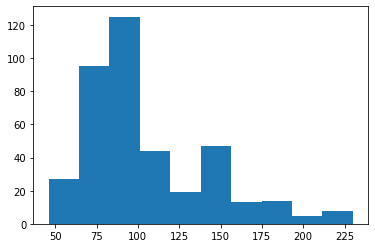

In [7]:
counts, bins = np.histogram(auto.horsepower)
plt.hist(bins[:-1], bins, weights=counts);

<h3>Q.4. Develop a Linear Regression model that predicts mpg using all the available features in the data.frame. Summarize it and comment on its quality. </h3>

In [8]:
# Develop the model 
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

y = auto['mpg']
X = auto.drop(['mpg'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train_sm = sm.add_constant(X_train)
statsModels = sm.OLS(y_train, X_train_sm).fit()
print(statsModels.summary())
print(statsModels.pvalues[statsModels.pvalues < 0.05].sort_values())
pvals = pvals.join(pd.DataFrame(columns=['no_transform'],data=statsModels.pvalues))

# Comment on its quality 
#  Many of the features are not relevant by looking at P values and confidence intervals. 
#  R^2 value of 0.815 means that the model is relatively well explained. 
#  Features: year, weight, origin, displacement are the most significant. 

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     169.3
Date:                Thu, 05 Nov 2020   Prob (F-statistic):           1.06e-94
Time:                        11:59:46   Log-Likelihood:                -729.75
No. Observations:                 277   AIC:                             1475.
Df Residuals:                     269   BIC:                             1504.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -19.4223      5.586     -3.477   

<h3>Q.5. Show histogram of engine displacement to reveal its non-normal distribution.</h3>

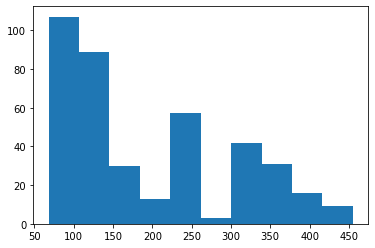

In [9]:
# Histogram of engine displacement
counts, bins = np.histogram(auto.displacement)
plt.hist(bins[:-1], bins, weights=counts);

<h3>Q.6. Normalize this feature by either applying Box-Cox transformation or any normalization tool from Scikit-learn. Plot this new feature to see whether it is now normally distributed.</h3>

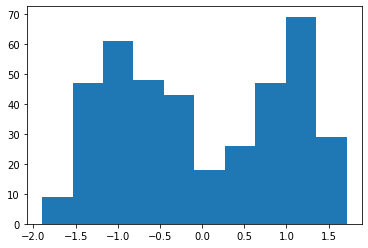

In [10]:
# Plot histogram of this new feature to reveal normal-like distribution
from sklearn.preprocessing import power_transform
auto.displacement = power_transform(auto[['displacement']], method='box-cox')

counts, bins = np.histogram(auto.displacement)
plt.hist(bins[:-1], bins, weights=counts);

<h3>Q.7. Recalculate the Linear Regression model to predict mpg with the new feature and comment on its performance in comparison to the original model.</h3>

In [11]:
# Calculate then new model
y = auto['mpg']
X = auto.drop(['mpg'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train_sm = sm.add_constant(X_train)
statsModels = sm.OLS(y_train, X_train_sm).fit()
print(statsModels.summary())
print(statsModels.pvalues[statsModels.pvalues < 0.05].sort_values())
pvals = pvals.join(pd.DataFrame(columns=['boxcox'],data=statsModels.pvalues))

# Comment on its performance

# The P value for displacement is on the order of e-7
#   which is much smaller than the previous value meaning that it is more significant.

# Also the R^2 value improved to 0.837.
#   0.837 - 0.815 = 0.022 improvement.

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     197.3
Date:                Thu, 05 Nov 2020   Prob (F-statistic):          4.73e-102
Time:                        11:59:47   Log-Likelihood:                -717.51
No. Observations:                 277   AIC:                             1451.
Df Residuals:                     269   BIC:                             1480.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -32.2358      5.704     -5.651   

<h3>Q.8. What is the mean and standard deviation for all the features?</h3>

In [12]:
pd.DataFrame(columns=['mean'], data=auto.mean()).join(
    pd.DataFrame(columns=['std'], data=auto.std()
))

,mean,std
mpg,2.351587e+01,7.825804
cylinders,5.458438e+00,1.701577
displacement,2.526387e-15,1.001262
horsepower,1.043312e+02,38.266994
weight,2.970262e+03,847.904119
acceleration,1.555567e+01,2.749995
year,7.599496e+01,3.690005
origin,1.574307e+00,0.802549


<h3>Q.9. Center all the features, so that their mean is 0 and scale them, so that their standard deviation is 1. Recalculate the Linear Regression model, comment on its performance.</h3>

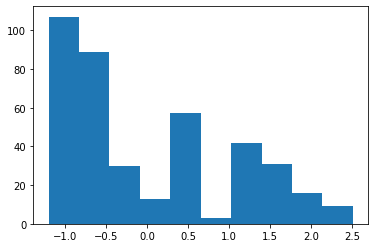

mean: 0.0, std: 1.0013


In [13]:
# Center and scale
from sklearn import preprocessing
auto = pd.read_csv('../data/auto.csv')
auto.horsepower = auto.horsepower.fillna(auto.horsepower.median())
auto = pd.DataFrame(columns=auto.columns,data=preprocessing.scale(auto))

plt.figure()
counts, bins = np.histogram(auto.displacement)
plt.hist(bins[:-1], bins, weights=counts)
plt.show()

print(f'mean: {round(auto.displacement.mean(),4)}, std: {round(auto.displacement.std(),4)}');

In [14]:
# Recalculate the model
y = auto['mpg']
X = auto.drop(['mpg'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train_sm = sm.add_constant(X_train)
statsModels = sm.OLS(y_train, X_train_sm).fit()
print(statsModels.summary())
print(statsModels.pvalues[statsModels.pvalues < 0.05].sort_values())
pvals = pvals.join(pd.DataFrame(columns=['scale'],data=statsModels.pvalues))

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     190.4
Date:                Thu, 05 Nov 2020   Prob (F-statistic):          2.53e-100
Time:                        11:59:47   Log-Likelihood:                -152.61
No. Observations:                 277   AIC:                             321.2
Df Residuals:                     269   BIC:                             350.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0081      0.026      0.316   

In [15]:
pvals = pvals.sort_values(['no_transform'])
pvals

,no_transform,boxcox,scale
year,1.280303e-29,8.842332e-30,1.682749e-27
weight,1.710769e-15,5.681476e-08,2.491623e-18
origin,4.762296e-04,3.217002e-01,1.130035e-03
displacement,3.656334e-02,2.128166e-07,1.660886e-02
horsepower,3.902340e-01,7.093347e-01,3.605631e-01
cylinders,3.974038e-01,2.197407e-04,2.394998e-01
acceleration,4.607504e-01,5.450955e-01,5.405046e-01
mpg,NaN,NaN,NaN


In [16]:
# Comment on its performance

# The R^2 value dropped slightly which means that the preprocessing 
#  didn't help the model. Slightly less data is explained.

# In fact, forcing the data into a normal Gaussian distrbution
#  can take away information.

# The displacement P value is on the order e-2 which means
#  it is less significant than the box-cox transformation.

<h3>Q.10. Create a new text cell in your Notebook: Complete a 50-100 word summary 
    (or short description of your thinking in applying this week's learning to the solution) 
     of your experience in this assignment. Include:
<br>                                                                       
What was your incoming experience with this model, if any?
what steps you took, what obstacles you encountered.
how you link this exercise to real-world, machine learning problem-solving. (What steps were missing? What else do you need to learn?)
This summary allows your instructor to know how you are doing and allot points for your effort in thinking and planning, and making connections to real-world work.
</h3>

<p>
<b> enter summery here</b>

I have some experience with data transformations. In my electrical engineering class, I often look at the log of my values. I enjoyed learning the other common transformations and how to visualize them. The most important lesson was understanding missing data and how to fill missing values without changing the information.
</p>